# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



dataset = pd.read_csv('/home/polina/Загрузки/car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [161]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,688,89,35,52,121,57,4,122,55,17,125,139,220,128,82,5,13,181,184
1,789,90,39,85,160,59,7,163,41,20,131,189,396,158,71,7,13,186,192
2,785,85,43,66,123,56,6,148,46,19,145,166,319,171,85,6,11,179,182
3,376,104,51,108,193,59,11,217,31,24,163,232,694,203,72,15,22,190,201
4,652,97,37,78,181,62,8,161,41,20,131,182,389,117,62,2,28,203,211
5,552,90,39,89,181,62,8,175,38,21,132,200,458,154,70,11,15,189,195
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,475,97,55,104,219,71,9,211,32,24,171,222,658,223,74,1,24,186,196
8,838,95,43,76,142,57,10,151,44,19,149,173,339,159,71,2,23,187,200
9,342,83,37,54,131,61,4,135,50,18,127,152,271,141,85,3,6,180,183


Methods `describe` and `info` deliver some useful information.

In [162]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.211293,93.781421,44.921676,82.143898,168.114754,61.409836,8.417122,169.282332,40.863388,20.624772,148.091075,188.912568,442.469945,175.280510,72.531876,6.482696,12.426230,188.856102,195.438980
std,245.493580,8.468250,6.200958,15.808135,32.226326,7.092299,4.276374,33.742078,7.905089,2.633551,14.583853,31.613998,179.882396,33.208609,7.257854,4.937767,8.948378,6.188586,7.562538
min,0.000000,73.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,208.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.000000,150.000000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,422.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,636.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,217.000000,597.000000,199.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,252.000000,126.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [163]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [164]:
### YOUR CODE HERE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Масштабирование признаков (Это необходимо для обеспечения одинакового масштаба всех признаков)
#(улучшает производительность моделей, особенно алгоритмов, которые зависят от шкалы признаков)
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean') 
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Преобразование в pandas DataFrame 
X_train_pd = pd.DataFrame(X_train_imputed)



#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarn

F1 Score: 0.6826322596931
Accuracy: 0.6868686868686869


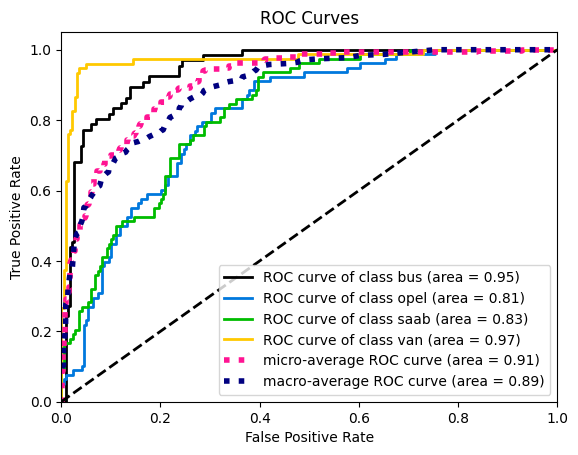

In [165]:
#YOUR CODE HERE 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt

param_grid = {
    'penalty': ['l1', 'l2'],
    'C' : np.linspace(1, 100, 20).tolist()
}


model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)


random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)


best_params = random_search.best_params_


best_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, **best_params)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)


f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)


print("F1 Score:", f1)
print("Accuracy:", accuracy)


skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

In [150]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

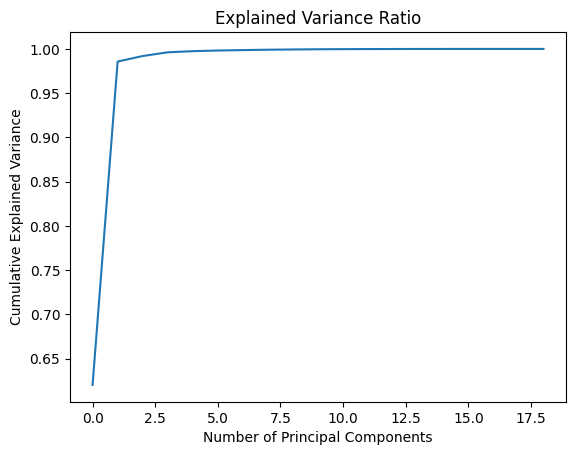

In [166]:
### YOUR CODE HERE 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()
X_train_pca = pca.fit_transform(X_train)


explained_variance_ratio = pca.explained_variance_ratio_


plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [167]:
### YOUR CODE HERE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


pca = PCA()
pca.fit(data_normalized)


explained_variance_ratio = pca.explained_variance_ratio_


total_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(total_variance >= 0.95) + 1


print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("Selected Number of Components:", n_components)


X_train, X_test, y_train, y_test = train_test_split(data_transformed, target, test_size=0.35)

Explained Variance Ratio:
[4.96347999e-01 1.59177527e-01 1.00449745e-01 6.22364085e-02
 5.19836735e-02 4.78701214e-02 2.80601309e-02 1.87083509e-02
 1.16175905e-02 8.30952453e-03 4.80164579e-03 3.30485188e-03
 2.30589810e-03 1.84113109e-03 1.12139496e-03 8.40971061e-04
 6.78602065e-04 3.25618143e-04 1.88162221e-05]
Selected Number of Components: 8


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

In [133]:
Чтобы выбрать подходящее количество компонентов для уменьшения размерности с помощью PCA, мы можем проанализировать explained variance ratio. 
Мы стремимся выбрать такое количество компонентов, которые охватывают значительную часть дисперсии, сохраняя при этом низкую размерность.
В данном коде мы выполняем PCA для нормализованных данных, используя StandardScaler для нормализации данных. 
Нормализация необходима, чтобы гарантировать, что все функции находятся в сопоставимом масштабе, 
что имеет решающее значение для PCA, поскольку оно основано на дисперсии функций.
Выбирая пороговое значение, например 95 %, мы находим баланс между уменьшением размерности и сохранением большей части важной информации в данных. 
Выбор слишком малого количества компонентов может привести к потере информации, тогда как выбор слишком большого количества компонентов может не дать 
существенных преимуществ и может увеличить сложность вычислений.

SyntaxError: invalid decimal literal (2160422965.py, line 6)

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarn

Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}
F1 Score: 0.6080960855548505
Accuracy: 0.6363636363636364


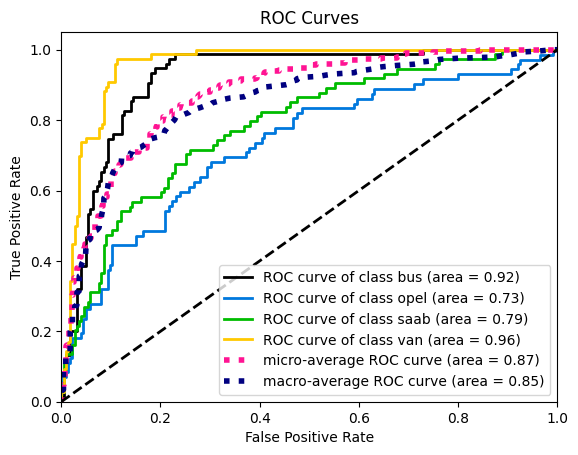

In [168]:
### YOUR CODE HERE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt


scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_normalized)


logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)


param_grid = {
    'C': np.linspace(1, 100, 20).tolist(),
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


print("Best Hyperparameters:", best_params)


y_pred = best_model.predict(pca.transform(X_test_normalized))


f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score:", f1)
print("Accuracy:", accuracy)

predicted_proba = best_model.predict_proba(pca.transform(X_test_normalized))
skplt.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [136]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score


dt = DecisionTreeClassifier()


param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}


grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


print("Best Hyperparameters:", best_params)


y_pred = best_model.predict(X_test)


f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("F1 Score:", f1)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 6}
F1 Score: 0.6287602226969012
Accuracy: 0.6296296296296297


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

/home/polina/env/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/polina/env/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/polina/env/lib/python3.11/sit

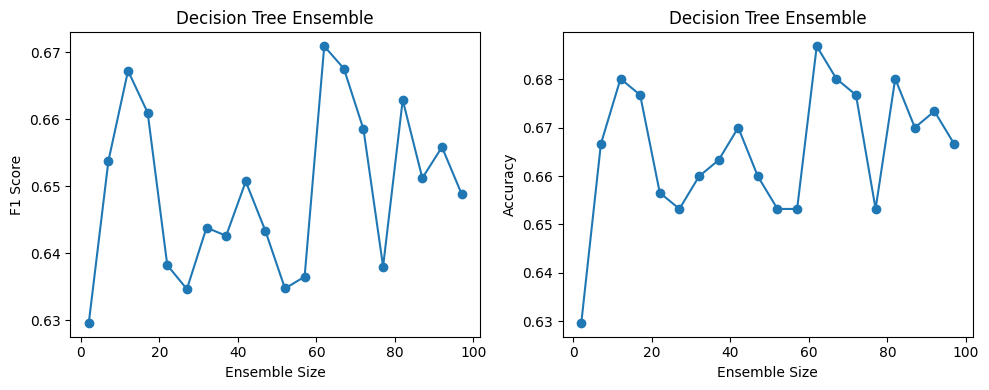

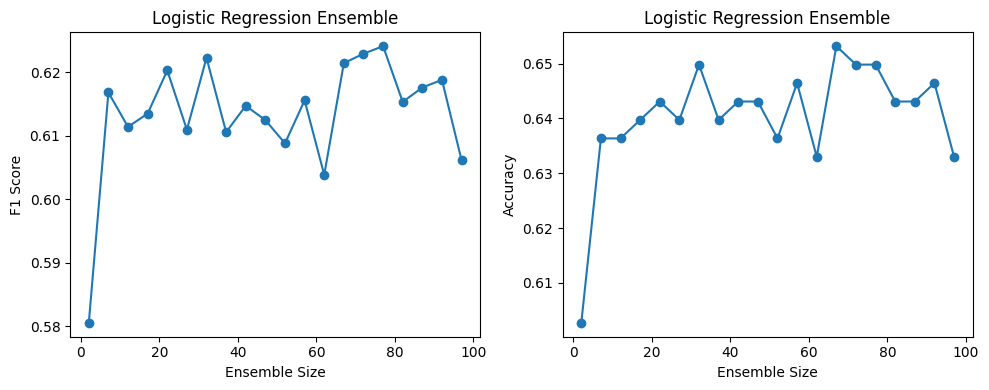

In [169]:
# YOUR CODE HERE 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt 

dt_params = {
    'max_depth': 6
}


lr_params = {
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol': 1e-3
}


ensemble_sizes = range(2, 101, 5)


f1_scores_dt = []
accuracy_scores_dt = []
f1_scores_lr = []
accuracy_scores_lr = []


for ensemble_size in ensemble_sizes:
    
    dt_ensemble = BaggingClassifier(base_estimator=DecisionTreeClassifier(**dt_params),
                                   n_estimators=ensemble_size)
    dt_ensemble.fit(X_train, y_train)
    dt_ensemble_pred = dt_ensemble.predict(X_test)
    f1_dt = f1_score(y_test, dt_ensemble_pred, average='weighted')
    accuracy_dt = accuracy_score(y_test, dt_ensemble_pred)
    f1_scores_dt.append(f1_dt)
    accuracy_scores_dt.append(accuracy_dt)
    
  
    lr_ensemble = BaggingClassifier(base_estimator=LogisticRegression(**lr_params),
                                   n_estimators=ensemble_size)
    lr_ensemble.fit(X_train, y_train)
    lr_ensemble_pred = lr_ensemble.predict(X_test)
    f1_lr = f1_score(y_test, lr_ensemble_pred, average='weighted')
    accuracy_lr = accuracy_score(y_test, lr_ensemble_pred)
    f1_scores_lr.append(f1_lr)
    accuracy_scores_lr.append(accuracy_lr)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_dt, marker='o')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.title('Decision Tree Ensemble')

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_dt, marker='o')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.title('Decision Tree Ensemble')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_lr, marker='o')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.title('Logistic Regression Ensemble')

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_lr, marker='o')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Ensemble')
plt.tight_layout()
plt.show()

In [115]:
На основе предоставленного графика мы можем наблюдать производительность дерева решений и  
логистической регрессии по мере увеличения размера .
Для  дерева решений  оценка F1 и точность увеличиваются по мере увеличения размера. 
Однако отдача от этого уменьшается, поскольку улучшение производительности становится менее значительным при увеличении размера . 
Оценка F1 и точность выходят на плато после достижения определенного размера .

Для логистической регрессии мы можем наблюдать аналогичную тенденцию. 
Оценка F1 и точность сначала увеличиваются, а затем стабилизируются по мере увеличения размера .


Судя по  графикам, кажется, что размер ансамбля около 65 алгоритмов можно считать оптимальным как для  дерева решений, 
так и для  логистической регрессии. 
За этим пределом улучшение производительности становится минимальным, а дальнейшее увеличение размера ансамбля может 
не дать существенных преимуществ.



SyntaxError: invalid syntax (3731951788.py, line 1)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

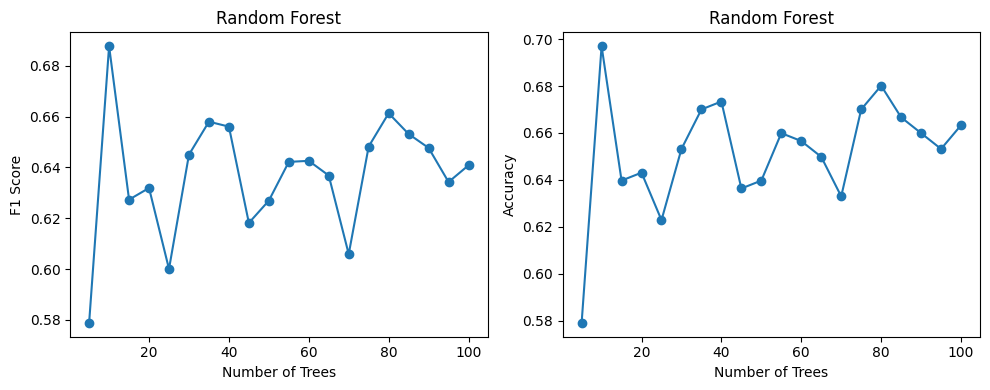

In [156]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

n_trees = range(5, 101, 5)


f1_scores = []
accuracy_scores = []


for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(n_trees, f1_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score')
plt.title('Random Forest')

plt.subplot(1, 2, 2)
plt.plot(n_trees, accuracy_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
Судя по предоставленному графику, оптимальное количество деревьев в случайном лесу составляет около 45. 
За пределами этого значения показатель F1 и точность модели случайного леса не демонстрируют значительных улучшений.

Оптимальное количество деревьев в случайном лесу отличается от оптимального количества логистических регрессий/деревьев решений в 2.6. 
В версии 2.6 оптимальное количество алгоритмов в ансамбле как для деревьев решений, так и для логистических регрессий составляло около 65. 
Однако в этом случае оптимальное количество деревьев модели случайного леса составляет около 45.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

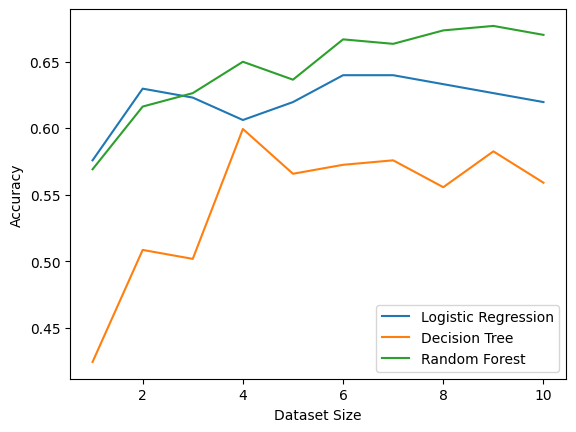

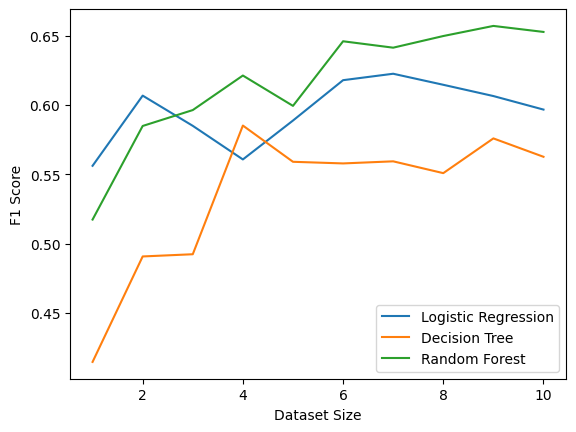

In [159]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

train_data_parts = np.array_split(X_train, 10)
train_target_parts = np.array_split(y_train, 10)


accuracy_scores_lr = []
f1_scores_lr = []

accuracy_scores_dt = []
f1_scores_dt = []

accuracy_scores_rf = []
f1_scores_rf = []


for i in range(1, 11):
    
    combined_train_data = np.concatenate(train_data_parts[:i])
    combined_train_target = np.concatenate(train_target_parts[:i])

    
    lr = LogisticRegression(C=37, penalty='l1', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
    lr.fit(combined_train_data, combined_train_target)

    
    dt = DecisionTreeClassifier(max_depth=11)
    dt.fit(combined_train_data, combined_train_target)

    
    rf = RandomForestClassifier(max_depth=11)
    rf.fit(combined_train_data, combined_train_target)

    
    lr_pred = lr.predict(X_test)
    dt_pred = dt.predict(X_test)
    rf_pred = rf.predict(X_test)

    
    lr_accuracy = accuracy_score(y_test, lr_pred)
    lr_f1_score = f1_score(y_test, lr_pred, average='weighted')

    dt_accuracy = accuracy_score(y_test, dt_pred)
    dt_f1_score = f1_score(y_test, dt_pred, average='weighted')

    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_f1_score = f1_score(y_test, rf_pred, average='weighted')

    
    accuracy_scores_lr.append(lr_accuracy)
    f1_scores_lr.append(lr_f1_score)

    accuracy_scores_dt.append(dt_accuracy)
    f1_scores_dt.append(dt_f1_score)

    accuracy_scores_rf.append(rf_accuracy)
    f1_scores_rf.append(rf_f1_score)


dataset_sizes = range(1, 11)

plt.plot(dataset_sizes, accuracy_scores_lr, label='Logistic Regression')
plt.plot(dataset_sizes, accuracy_scores_dt, label='Decision Tree')
plt.plot(dataset_sizes, accuracy_scores_rf, label='Random Forest')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(dataset_sizes, f1_scores_lr, label='Logistic Regression')
plt.plot(dataset_sizes, f1_scores_dt, label='Decision Tree')
plt.plot(dataset_sizes, f1_scores_rf, label='Random Forest')
plt.xlabel('Dataset Size')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [ ]:
Основываясь на окончательном графике, мы можем наблюдать производительность 
моделей логистической регрессии, дерева решений и случайного леса по мере увеличения размера набора данных.

Что касается показателей точности, все три модели демонстрируют тенденцию к 
увеличению по мере увеличения размера набора данных. 
Однако скорость улучшения варьируется в зависимости от модели.
Первоначально модель случайного леса имеет самую высокую точность, 
за ней следует модель логистической регрессии, а затем модель дерева решений. 
По мере увеличения размера набора данных модели логистической регрессии и дерева
решений демонстрируют аналогичные улучшения и в конечном итоге догоняют модель случайного леса.